In [21]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (14,7)

Contrôle de spin sur la sphère
==============================


On s'intéresse au contrôle de l'orientation d'un spin dans un champ magnétique, problème que l'on rencontre dans diverses applications comme l'imagerie médicale (IRM) ou l'ordinateur quantique. 
Un spin (ou qubit en informatique quantique) peut se représenter par un vecteur $\psi \in  \mathbb{R}^3$ de la sphère (*sphère de Bloch*)
$$
S^2= \{ (x,y,z)\in \mathbb{R}^3 \mid x^2+y^2+z^2=1 \} 
$$
et on cherche à simuler son comportement lorsqu'il est placé dans un champ magnétique externe. Plus particulièrement, on voudrait simuler un *transfert de population*, c'est à dire un choix de champ magnétique permettant de faire passer une population de $p$ spins de la position initiale $-e_z = (0,0,-1)$ à la position finale $e_z=(0,0,1)$ en un temps $T$ donné. Les spins n'ayant pas tous exactement les mêmes propriétés de couplage avec le champ magnétique ambiant, il faut que ce transfert soit *robuste*, c'est-à-dire les amenant tous au voisinage de la cible malgré leur hétérogénéité.

Notre système dynamique est donc composé de $p$ sous-systèmes indépendants $(\psi_1,\ldots,\psi_i,\ldots,\psi_p)$, chacun évoluant selon
$$ 
\dot\psi_i = r_i(t) \wedge \psi_i, \qquad \psi_i(0)\in S^2 \tag{1}, \qquad i\in\{1,\ldots, p \}
$$
où $\psi_i\in \mathbb{R}^3$ décrit l'orientation du spin $i$, $r_i(t)\in \mathbb{R}^3$ est le champ magnétique externe ``vu'' par le spin $i$ au temps $t$, et $\wedge$ dénote le produit vectoriel. 

En pratique, on est souvent dans la situation suivante : un champ magnétique $E$ intense selon l'axe $Oz$ fixe, et un champ contrôlable $u(t)$, à choisir, selon l'axe $Ox$. Selon les propriétés de couplage magnétique de chaque spin, chaque spin reçoit alors le champ magnétique
$$
r_i(t)=(\delta_i u(t),0,E_i)
$$ 
avec $E_i\in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min},\delta_{\max}]$, pour des paramètres $E, \alpha, \delta_{\min},\delta_{\max}$ décrivant l'hétérogénité du système.

Les paramètres $E_i$ et $\delta_i$ de chaque spin étant inconnus, on cherche alors à effectuer un transfert de population *robuste*, c'est-à-dire assurant que tous les spins atteignent une orientation très proche de la cible $e_z$ malgré les incertitudes sur $E_i$ et $\delta_i$ et se basant seulement sur la connaissance de leurs intervalles.


## Simulation du transfert d'un spin sur la sphère

**Question 1** 

**1a** Justifier que toute solution du problème de Cauchy 
$$ 
\dot\psi = r(t) \wedge \psi, \qquad \psi(0)\in S^2 
$$
reste sur la sphère $S^2$ en tous temps. 

**Réponse**: Le vecteur vitesse est orthoradial, donc le rayon ne varie pas (c'est pas comme ça qu'on fait en maths mais tqt).
Le produit scalaire de $\dot\psi$ par $r$ est nul à tout instant, donc la valeur de $\psi$ projetté sur $r$ est constante, ie $\psi$ reste sur la sphere unité.

On introduit les matrices anti-symétriques suivantes
$$\Omega_x=\left(\begin{matrix}
0& 0 &0 \\
0& 0 &-1 \\
0& 1 &0 \\
\end{matrix}\right), \qquad \Omega_y=\left(\begin{matrix}
0& 0 &1 \\
0& 0 &0 \\
-1& 0 &0 \\
\end{matrix}\right), \qquad
\Omega_z=\left(\begin{matrix}
0& -1 &0 \\
1& 0 & 0 \\
0& 0 &0 \\
\end{matrix}\right). $$

**1b** Vérifier que pour tout $(r_x,r_y,r_z)\in \mathbb{R}^3$ et $\psi \in \mathbb{R}^3$, 
$$
\left(\begin{matrix}
r_x \\
r_y \\
r_z \\
\end{matrix}\right) \wedge \psi = (r_x \Omega_x+ r_y \Omega_y +r_z \Omega_z) \psi
$$
c'est-à-dire que $\Omega_x$ (resp. $\Omega_y,\Omega_z$)  est la représentation matricielle de l'application linéaire $\psi \mapsto e_x \wedge \psi$ (resp. $\psi \mapsto e_y \wedge \psi$, $\psi \mapsto e_z \wedge \psi$).

L'équation $(1)$ se réécrit donc 
$$
\dot\psi_i= (E_i \Omega_z+ \delta_i u(t) \Omega_x )\psi_i, \qquad \psi_i(0)\in S^2 \tag{2}
$$
c'est-à-dire sous forme d'une équation différentielle linéaire, décrite par une matrice $E_i \Omega_z+ \delta_i u(t) \Omega_x$ dépendant du temps.

**Question 2** On cherche à simuler l'équation (2) numériquement, d'abord dans le cas où il y a un seul spin et sans incertitude, c'est-à-dire 
$$
\dot\psi= (E \Omega_z+ \delta u(t) \Omega_x )\psi, \qquad \psi(0)=-e_z \tag{3}
$$
avec $T=50$, $E=2$, $\delta=1$ et la commande 
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ \frac{\sin(\pi t/T)}{\pi/T}\right) 
$$

**2a** Coder un schéma Euler explicite résolvant l'équation différentielle (3). Tracer l'évolution de la norme de $\psi$. Interpréter.

**2b** Même question avec un schéma Euler implicite.

**2c** Proposer et coder un schéma qui reprojette l'état sur la sphère à chaque pas de temps. Comparer. Tracer la loi de contrôle $t\mapsto u(t)$ et la trajectoire du spin $t\mapsto \psi(t)$ en 3D. Commenter.

In [22]:
E=2
delta=1 
T=50
u = lambda t: (1-np.cos(2*np.pi*t/T))*np.cos(E*t+ np.sin(np.pi *t/T)/(np.pi/T))
t_0,t_f = 0,50
psi_0=np.array([0,0,-1])
dt=1e-3
Omega_x=np.array([[0,0,0],[0,0,-1],[0,1,0]])
Omega_z=np.array([[0,-1,0],[1,0,0],[0,0,0]])

def F(psi,t,E,delta):
    return (E*Omega_z + delta*u(t)*Omega_x).dot(psi)

def F_1(psi,t,E,delta):
    return np.linalg.inv(np.identity(3) - dt*(E*Omega_z + delta*u(t)*Omega_x)).dot(psi)

def norme(X):
    return ((X[:,0]**2+X[:,1]**2+X[:,2]**2)**(1/2))

def euler_explicit(psi_0,t_0,t_f,E,delta,dt):
    N = int((t_f - t_0) // dt)
    X = np.zeros((N+1,3))
    X[0] = psi_0
    psi = psi_0
    for i in range(N):
        psi = psi + dt*F(psi,t_0 + i*dt,E,delta)
        X[i+1] = (psi)
    return X

def euler_implicit(psi_0,t_0,t_f,E,delta,dt):
    N = int((t_f - t_0) // dt)
    X = np.zeros((N+1,3))
    X[0] = psi_0
    psi = psi_0
    for i in range(N):
        psi = F_1(psi,t_0+(i+1)*dt,E,delta)
        X[i+1] = (psi)
    return X

def euler_projete(psi_0,t_0,t_f,E,delta,dt):
    ax = plt.figure().add_subplot(projection='3d')

    X = (euler_implicit(psi_0,t_0,t_f,E,delta,dt))

    ax.plot(X[:,0],X[:,1],X[:,2], label='parametric curve')
    ax.legend()

    plt.show()
    return None

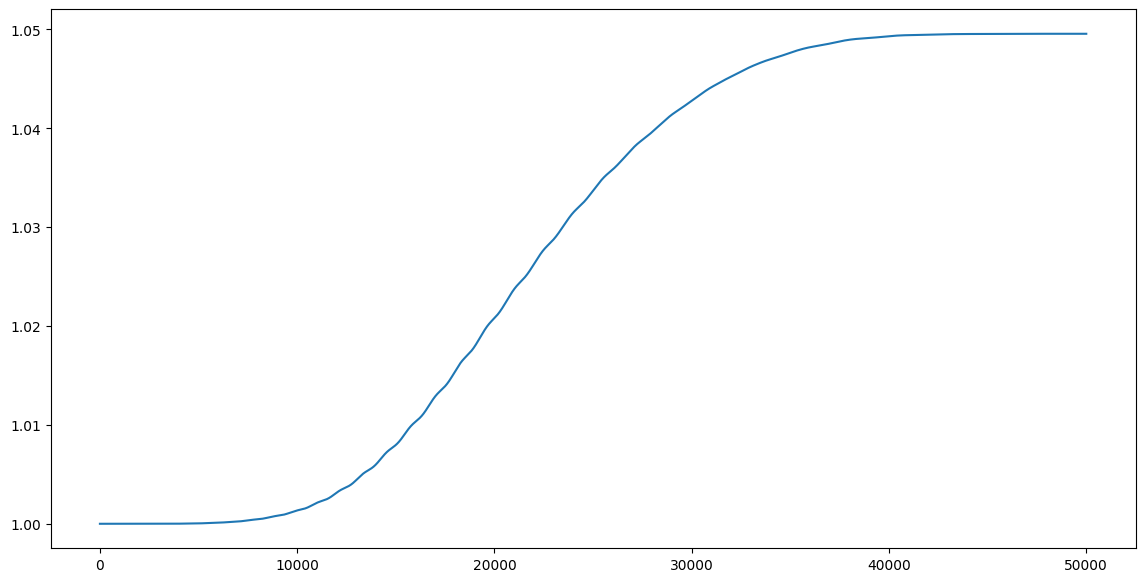

In [23]:
X = (euler_explicit(psi_0,t_0,t_f,E,delta,dt))

plt.plot(np.arange(X.shape[0]),norme(X))

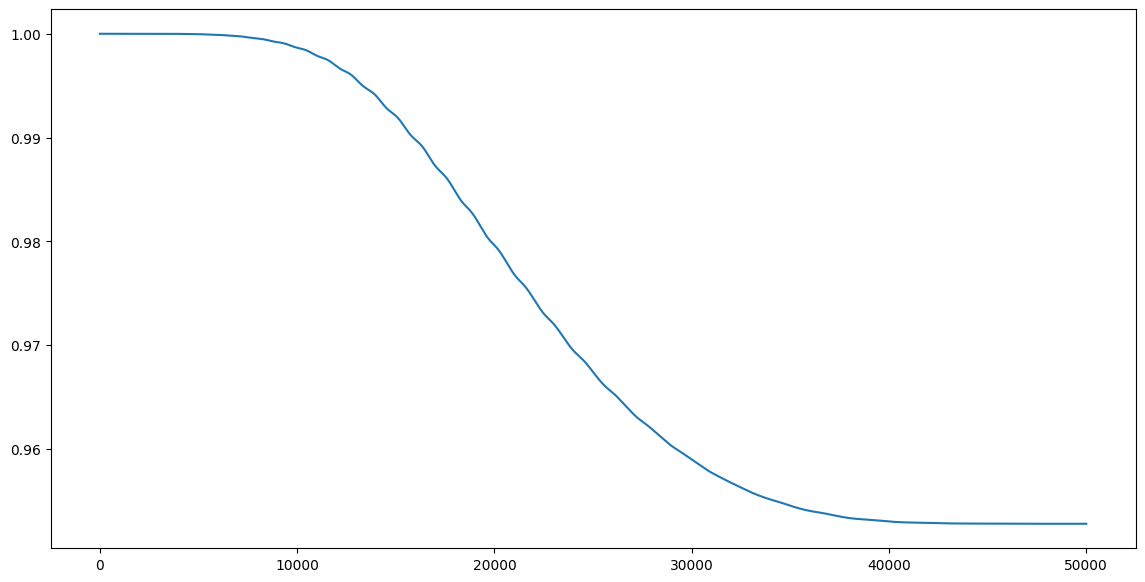

In [24]:
X = euler_implicit(psi_0,t_0,t_f,E,delta,dt)

plt.plot(np.arange(X.shape[0]),norme(X))

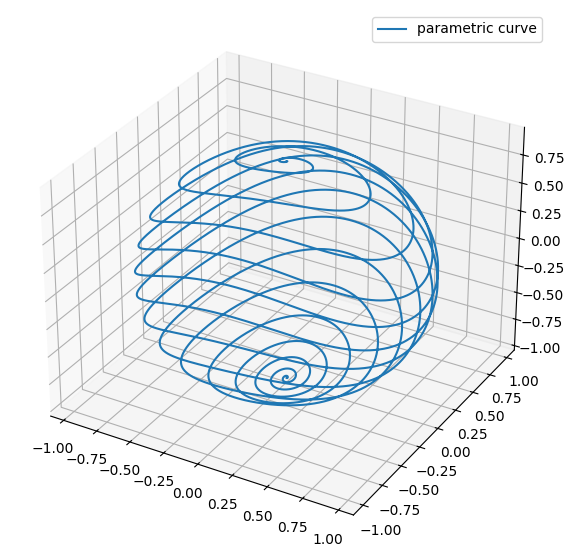

In [25]:
euler_projete(psi_0,t_0,t_f,E,delta,dt)

---
**Vocabulaire // ouverture mathématique**

$S^2$ est une surface dans $\mathbb{R}^3$, c'est un cas particulier de **variété différentielle**. L'équation (2) assure que si $\psi$ appartient à la variété, $\dot \psi$ appartient au **plan tangent** en $\psi$ de $S^2$ et donc que $S^2$ est invariant par la dynamique. Pour des simulations en temps long sur des variétés il est souvent important de s'assurer que la dynamique discrete (celle du schéma numérique) reste exactement sur la variété (et non approximativement)

---

## Robustesse et simulation du transfert d'un ensemble de spins

On considère maintenant un ensemble de $p$ spins évoluant chacun selon (2) mais avec différentes valeurs de $E_i \in [E-\alpha,E+\alpha]$ et $\delta_i \in [\delta_{\min}, \delta_{\max}]$. On souhaite vérifier que le même contrôle $u$ fonctionne sur tous simultanément, c'est-à-dire évaluer sa robustesse.

**Question 3**

Simuler $p=10$ spins avec la méthode retenue ci-dessus, en faisant varier $E_i$ puis $\delta_i$. Vérifier que pour $\alpha = 0.5$, $\delta_{\min}= 0.4$ et $\delta_{\max}= 3.5$, la même loi de contrôle $u$ assure tout de même la transition de $-e_z$ à $e_z$ avec une excellente précision à évaluer.

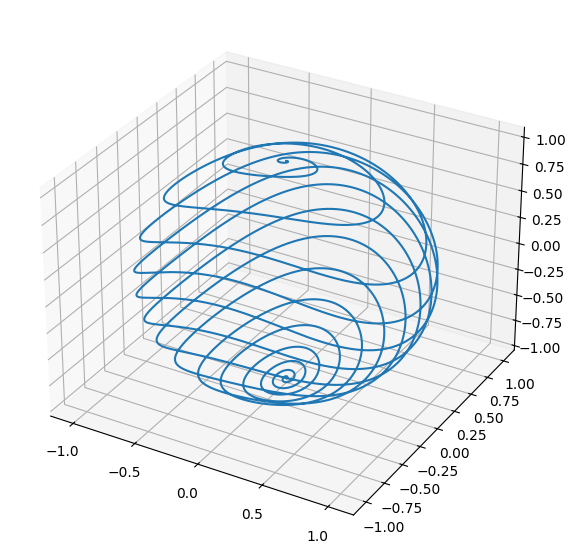

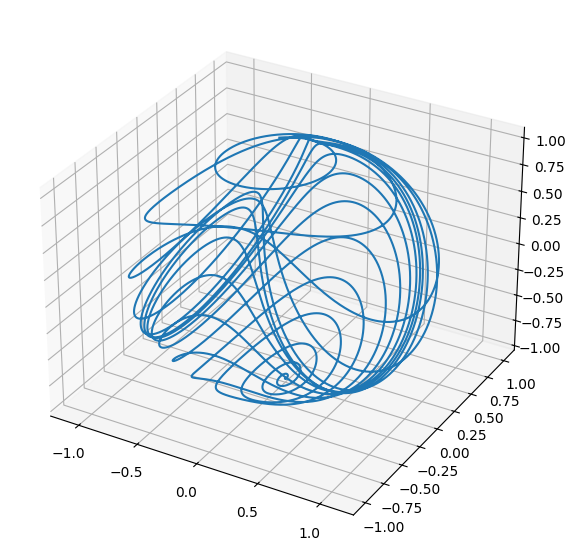

In [55]:
p = 2 # mis a 2 par lisibilité, à modifier avant de rendre
alpha = 0.5
delta_min,delta_max= 0.4,3.5
liste_E = np.random.uniform(E-alpha,E+alpha,p)
liste_delta = np.random.uniform(delta_min, delta_max, p)


for i in range(p):
    ax = plt.figure().add_subplot(projection='3d')
    X = euler_explicit(psi_0, t_0, t_f, liste_E[i], liste_delta[i], dt)
    ax.plot(X[:,0],X[:,1],X[:,2])

plt.show()

---
**Vocabulaire // ouverture mathématique et physique**

Pour obtenir ce contrôle robuste, on utilise le théorème adiabatique ainsi qu'une approximation de l'onde tournante. On règle par exemple la bande de fréquence à parcourir en fonction de $\alpha$ en prenant
$$
u(t)= (1-\cos(2\pi t/T))\cos\left(E t+ 2\alpha\frac{\sin(\pi t/T)}{\pi/T}\right) 
$$
On pourra se référer à cet [article](https://www.sciencedirect.com/science/article/pii/S0022039622001401?via%3Dihub).

---

## Simulation de l'opérateur de flot

Pour améliorer l'efficacité de la simulation numérique, on souhaite pouvoir utiliser plusieurs processeurs en parallèle. Pour cela, il est possible d'exploiter le caractère linéaire de l'équation différentielle et de calculer plutôt son opérateur de flot, c'est à dire à l'application $\psi_0 \mapsto \psi(T)$ permettant de passer de la condition initiale à la solution de l'équation (3) au temps $T$. L'équation (3) étant linéaire, le flot de l'équation est une application linéaire, représentée par une matrice $U(T)\in \mathbb{R}^{3\times 3}$ ici en dimension finie, obtenue en résolvant l'équation différentielle suivante :

$$\dot U = (E \Omega_z+\delta u(t) \Omega_x ) U , \qquad U(0)= I_3 \tag{4}$$

où $I_3$ dénote la matrice identité de dimension 3. On notera bien que $U(t)$ est une matrice réelle $3\times 3$.

---
**Vocabulaire // ouverture mathématique**


L'application linéaire $U(t)$ s'appelle **matrice de transition** entre les temps 0 et $t$ en dimension finie, et plus généralement **propagateur** en mécanique quantique, et **semigroupe** dans le cadre des équations aux dérivées partielles.

---

**Question 4** On cherche à résoudre numériquement l'équation (4).

**4a** Vérifier que la connaissance de $U(t)$ permet de résoudre directement l'équation (3) car $\psi(t) = U(t) \psi_0$ pour tout $t\in [0,T]$.

**4b** Prouver que pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$ et justifier que le determinant de $U$ reste égal à 1. 

On en déduit que $U(t)$ reste en tout temps une matrice de rotation. On rappelle que $SO_3$ dénote l'ensemble des matrices de rotation de dimension 3.

**4c** (BONUS) Proposer une méthode de projection sur $SO_3$ et implémenter un schéma Euler avec cette projection. Indication : regarder [ici](https://en.wikipedia.org/wiki/Singular_value_decomposition#Nearest_orthogonal_matrix).

**4d** Vérifier que pour toute matrice $A$ antisymétrique telle que $(I-A)$ est inversible, $(I+A)(I-A)^{-1}\in SO_3$. En déduire que le schéma numérique suivant assure que $U^j$ reste dans $SO_3$ et vérifier qu'il est un schéma consistant d'ordre 1 pour l'équation différentielle (4):
$$U^0= I_3, \qquad U^{j+1}= \left(I_3 + \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x )\right) \left(I_3 - \frac{\Delta t}{2}(E \Omega_z+\delta u(t) \Omega_x ) \right)^{-1} U^j \tag{5}$$
On admettra pour cela que le développement limité $\left(I_3 - \Delta t M \right)^{-1} = I_3 + \Delta t M + O(\Delta t^2)$ est valable en matriciel.

**4e** Compléter ci-dessous l'implémentation du schéma de l'equation (5) et vérifier la solution obtenue pour $\psi(T)$ si $\psi(0)=-e_z$.

**Réponse 4a:** Supposons avoir $U(t)$ pour tout $t$ dans $[0,T]$ on a aussi pour tout t, $\dot U \psi_0= (E \Omega_z+\delta u(t) \Omega_x ) U \psi_0, \qquad U(0)\psi_0= \psi_0$ en multipliant par $\psi_0$. Ainsi, $\psi$ et $U\psi_0$ sont solution au même problème de Cauchy. Par unicité, $\psi = U\psi_0$

**Réponse 4b:** Notons $V = U^\top U$. Si on dérive $V$ par rapport au temps, et qu'on applique $(4)$, on obtient: $$\dot V = U^\top(E \Omega_z+\delta u(t) \Omega_x )^\top U + U^\top(E \Omega_z+\delta u(t) \Omega_x ) U$$
Or par antisymétrie de $\Omega_x$ et $\Omega_z$, les deux termes s'annulent, d'où $\dot V = 0$, ie  $U^\top U$ est constant. 

Ainsi, pour tout $t\geq 0$, $U(t)^\top U(t) = I_3$. U est donc toujours dans le groupe orthogonal, et donc son déterminant est toujours dans $\{1,-1\}$. 
Or $t \mapsto det(U(t))$ étant continue (U est continue car solution d'une équation différentielle linéaire, et le déterminant étant aussi continu) sur le connexe par arcs $[0,+\infty[$, son image est connexe par arcs. Ainsi, et puisque $det(U(0))=1$, on a que $det(U(t))=1$ pour tout t positif.

**Réponse 4c:** 

In [27]:
I=np.eye(3)

def matrice_transition(t_in,t_f,E,dt):
    temps=np.arange(t_in,t_f+dt/2,dt)
    N=len(temps)
    sol=np.empty((N,3,3))
    sol[0]=np.eye(3)
    for j,t in enumerate(temps[:-1]):
        sol[j+1]= ...
    return temps,sol

temps,sol_mat_trans = matrice_transition(0,T,E,dt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot((sol_mat_trans@psi_0)[:,0],(sol_mat_trans@psi_0)[:,1],(sol_mat_trans@psi_0)[:,2])
ax.set_title('Solution via (4)')

fig, ax = fig.figure()
ax.plot(temps, np.linalg.norm(np.einsum('nij,nkj-> nik',sol_mat_trans,sol_mat_trans)-I,axis=(1,2)),label='norm of U^T U -I_3 ')
ax.legend()
ax.set_title('Vérification de la préservation du groupe')

print(f"Valeur finale de psi : {sol_mat_trans[-1]@psi_0}")

TypeError: float() argument must be a string or a real number, not 'ellipsis'

---
**Vocabulaire // ouverture mathématique**


$SO_3$ est à la fois un groupe et une variété différentielle (avec une structure compatible avec les lois du groupe), c'est ce que l'on appelle un **groupe de Lie**. Les matrices $\Omega_x,\Omega_y,\Omega_z$ jouent un rôle particulier et forment ce que l'on appelle (les générateurs de) l'**Algèbre de Lie** du groupe.

Par ailleurs, le schéma proposé dans l'équation (4) est à la fois relié à la **transformation de Cayley** d'une matrice unitaire, et à une famille de schémas que l'on nomme **approximations de Padé**.


---

## BONUS : Parallélisation de la simulation de systèmes linéaires

**Question 5** On suppose que l'on dispose de $N$ processeurs. Expliquer comment exploiter le calcul de la matrice de transition de la question précédente pour résoudre l'équation (2) de manière parallèle. Commenter le gain (ou non) en terme de temps d'exécution. 

---
**Vocabulaire // ouverture mathématique**

Lorsque l'équation n'est pas linéaire, paralléliser en temps la résolution d'une équation différentielle est un sujet difficile. Il est possible d'utiliser des méthodes  de type **Parareal**.

---